**Script de recherche et d'appariement des données Geod'Air**

**Description**

- Récupération automatique des données des 10 stations les plus proches, quelle que soit la typologie de la station (de fond, de proximité, etc.), sur la période d’enquête d’intérêt

- Récupération automatique des données des 3 stations de fond les plus proches, sur la période d’enquête d’intérêt

- Calcul des distances des stations aux bâtiments

- Qualification des données récupérées (indicateur(s) de qualité de la mesure, données manquantes, identification des valeurs aberrantes (ex : concentration < 0) )

- Construction d’une table structurée : identifiant du bâtiment, période d’enquête, longitude et latitude du bâtiment, identifiants des stations récupérées, longitudes et latitudes des stations, distances entre le bâtiment et les stations, typologies des stations (de fond, de proximité), caractère mobile ou fixe des stations, substances et concentrations mesurées, période de mesure, indicateur(s) de qualité des mesures, limites de détection et quantification.

In [1]:
# Automatic reload of the Jupyter Notebook
%load_ext autoreload
%autoreload 2

# Load the .env
%load_ext dotenv

# Load the API key

In [2]:
import os

apikey_geodair = os.environ.get('apikey_geodair')

if apikey_geodair is not None:
    print('✅ apikey_geodair variable loaded')

else:
    print('❌ apikey_geodair variable not loaded')

✅ apikey_geodair variable loaded


# API - Stations

Cette API permet d'obtenir la liste des stations de mesure ainsi que toutes les informations les caractérisant (type de site, code, adresse, date de mise en service, etc.).

## Requête

Renseigner dans :

- **date** : la date souhaitée
- **apikey** : la clé API

In [3]:
# API GET request

import requests

# Paramètres à choisir
date='2023-04-25'
apikey=apikey_geodair

url_stations = f'https://www.geodair.fr/api-ext/station/export?date={date}'
headers = {'accept': 'text/csv', 'apikey': apikey}

req = requests.get(url_stations, headers=headers)

In [4]:
# API Response headers

req.headers

{'Date': 'Wed, 17 May 2023 14:27:30 GMT', 'Content-Type': 'text/csv;charset=ISO-8859-1', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-RateLimit-Limit-Hour': '15', 'RateLimit-Remaining': '10', 'RateLimit-Reset': '1951', 'RateLimit-Limit': '15', 'X-RateLimit-Remaining-Hour': '10', 'X-Token-Expires-In': '34352.564240932', 'Vary': 'Origin, Access-Control-Request-Method, Access-Control-Request-Headers, Origin', 'Content-Disposition': 'attachment; filename="Stations_2023-04-25.csv"', 'X-XSS-Protection': '1; mode=block', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Pragma': 'no-cache', 'Expires': '0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-Auth-Token', 'X-Kong-Upstream-Latency': '369', 'X-Kong-Proxy-Latency': '2', 'Via': 'kong/2.6.0'}

In [5]:
# API data raw

data_stations = req.content.decode('ISO-8859-1')

In [6]:
# API data into a Pandas DataFrame

import pandas as pd
import tempfile
import io

df_stations = pd.read_csv(io.StringIO(data_stations), sep=";")

In [7]:
df_stations

Type de site     Code  Code UE                   Nom   
0      classique  FR28028  FR28028         Bethune Stade  \
1      classique  FR38024  FR38024         RDT SAINT-LEU   
2      classique  FR07056  FR07056        Pays du Mezenc   
3      classique  FR02043  FR02043             Marignane   
4      classique  FR34043  FR34043            Oysonville   
..           ...      ...      ...                   ...   
559    classique  FR12047  FR12047    BESSIERES ECONOTRE   
560    classique  FR22009  FR22009   Ecole de Carling(9)   
561    classique  FR08018  FR08018   Montpellier St Gely   
562    classique  FR05074  FR05074  Le Havre Ec. Herriot   
563    classique  FR16001  FR16001      Strasbourg Ouest   

                       Alias   
0              Bethune Stade  \
1                        RDT   
2                        NaN   
3                  Marignane   
4                 Oysonville   
..                       ...   
559       BESSIERES ECONOTRE   
560  Pays Naborien (Carling)   
561      Montpellier St Gely   
562     Le Havre Ec. Herriot   
563                STG Ouest   

                                           Description   
0                                                  NaN  \
1    La station RDT est implantée dans un secteur d...   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
559                         suivi autour incinérateur    
560                                                NaN   
561  Dans le cours d'une cole dans un quartier rsid...   
562                                                NaN   
563                                                NaN   

    Date d'entrée en service (à 00h00) Date de fin de service (à 00h00)   
0                           01/06/2004                              NaN  \
1                           30/12/2015                              NaN   
2                           08/09/2016                              NaN   
3                           02/02/2018                              NaN   
4                           21/07/2001                              NaN   
..                                 ...                              ...   
559                         25/07/2005                              NaN   
560                         01/01/1982                              NaN   
561                         26/04/2000                              NaN   
562                         28/04/1999                              NaN   
563                         18/10/1994                              NaN   

           Etat                            Adresse  ...   
0    En service  Rue F Bar-Ctr Sportif L. Lagrange  ...  \
1    En service                                NaN  ...   
2    En service                                NaN  ...   
3    En service                  2 Rue de Provence  ...   
4    En service               rue du Château d'eau  ...   
..          ...                                ...  ...   
559  En service         Chemin du port de l aouquo  ...   
560  En service                     Ecole primaire  ...   
561  En service                  rue de la Rompude  ...   
562  En service         127 Boulevard Francois 1er  ...   
563  En service                    5 Rue de Madrid  ...   

    Pourcentage grandes cultures 1km Nombre d'habitants 1km   
0                                NaN                    NaN  \
1                                NaN                    NaN   
2                                NaN                    NaN   
3                                NaN                    NaN   
4                                NaN                    NaN   
..                               ...                    ...   
559                              NaN                    NaN   
560                              NaN                    NaN   
561                     

In [8]:
df_stations_geodair = df_stations[[
    "Type de site",
    "Code",
    "Alias",
    "Longitude",
    "Latitude",
    "Implantation",
    "Mobilité"]]

df_stations_geodair.head(20)

Type de site     Code                       Alias  Longitude   Latitude   
0     classique  FR28028               Bethune Stade   2.635692  50.535385  \
1     classique  FR38024                         RDT  55.302844 -21.213212   
2     classique  FR07056                         NaN   4.226006  44.983770   
3     classique  FR02043                   Marignane   5.222281  43.416531   
4     classique  FR34043                  Oysonville   1.955611  48.391139   
5     classique  FR09003             place de VERDUN  -1.153603  46.162556   
6     classique  FR04331                       LIMAY   1.754142  48.985523   
7     classique  FR04100                 VILLEMOMBLE   2.507222  48.881947   
8     classique  FR04063             MANTES-LA-JOLIE   1.703300  48.996400   
9     classique  FR06134                 Saint Amand   3.427940  50.456470   
10    classique  FR34041                     Fulbert   1.510139  48.444417   
11    classique  FR31001                  GRAND PARC  -0.579444  44.861390   
12    classique  FR20060          VENISSIEUX Village   4.883600  45.703600   
13    classique  FR11016                   Marcq CTM   3.076560  50.670030   
14    classique  FR31020                        LACQ  -0.616944  43.410557   
15    classique  FR01014              Pont-à-Mousson   6.058336  48.915000   
16    classique  FR28034  ISBERGUES impasse Vandaele   2.473228  50.625758   
17    classique  FR35006                TULLE - Hugo   1.760000  45.260000   
18    classique  FR02020            Rognac les Brets   5.220046  43.510802   
19    classique  FR08617           Nimes La Calmette   4.265810  43.925400   

              Implantation        Mobilité  
0                  Urbaine    Station Fixe  
1   Rurale près des villes    Station Fixe  
2         Rurale régionale    Station Fixe  
3                  Urbaine    Station Fixe  
4         Rurale régionale    Station Fixe  
5                  Urbaine    Station Fixe  
6              Périurbaine    Station Fixe  
7                  Urbaine    Station Fixe  
8              Périurbaine    Station Fixe  
9              Périurbaine    Station Fixe  
10                 Urbaine    Station Fixe  
11                 Urbaine    Station Fixe  
12                 Urbaine    Station Fixe  
13                 Urbaine    Station Fixe  
14  Rurale près des villes    Station Fixe  
15                 Urbaine    Station Fixe  
16  Rurale près des villes  Station Mobile  
17                 Urbaine    Station Fixe  
18             Périurbaine    Station Fixe  
19             Périurbaine    Station Fixe

## Description

In [9]:
# Df shape

df_stations.shape

(564, 52)

In [10]:
# Df info

df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Type de site                               564 non-null    object 
 1   Code                                       564 non-null    object 
 2   Code UE                                    564 non-null    object 
 3   Nom                                        564 non-null    object 
 4   Alias                                      558 non-null    object 
 5   Description                                167 non-null    object 
 6   Date d'entrée en service (à 00h00)         564 non-null    object 
 7   Date de fin de service (à 00h00)           3 non-null      object 
 8   Etat                                       564 non-null    object 
 9   Adresse                                    496 non-null    object 
 10  Code commune              

In [11]:
# Df Nb de null

df_stations.isnull().sum()

Type de site                                   0
Code                                           0
Code UE                                        0
Nom                                            0
Alias                                          6
Description                                  397
Date d'entrée en service (à 00h00)             0
Date de fin de service (à 00h00)             561
Etat                                           0
Adresse                                       68
Code commune                                   0
Commune                                        0
Zas                                            0
Réseau                                         0
Organisme                                      0
Conformité                                     0
Commentaire                                  520
Longitude                                      0
Latitude                                       0
Altitude                                       0
Système de projectio

In [12]:
# Df % de null

round(df_stations.isnull().sum()/len(df_stations)*100,1)

Type de site                                   0.0
Code                                           0.0
Code UE                                        0.0
Nom                                            0.0
Alias                                          1.1
Description                                   70.4
Date d'entrée en service (à 00h00)             0.0
Date de fin de service (à 00h00)              99.5
Etat                                           0.0
Adresse                                       12.1
Code commune                                   0.0
Commune                                        0.0
Zas                                            0.0
Réseau                                         0.0
Organisme                                      0.0
Conformité                                     0.0
Commentaire                                   92.2
Longitude                                      0.0
Latitude                                       0.0
Altitude                       

# Statistiques

Plusieurs statistiques peuvent être obtenues via les API Geod'Air :
- Moyenne journalière
- Moyenne horaire
- Moyenne annuelle
- Maximum horaire journalier

Pour chacun de ces fichiers, la valeur à prendre se trouve dans la colonne "**Valeur brute**" (la colonne "Valeur" est un arrondi à l'entier près).

Pour toutes ces API, 3 informations sont à renseigner :
- **date** : la date souhaitée
- **polluant** : le code FR du polluant (chaîne de 2 caractères)
- **apikey** : la clé API

Liste des polluants avec leurs codes :

Source : https://www.geodair.fr/sites/default/files/media-files/2022-05/liste_polluants.pdf

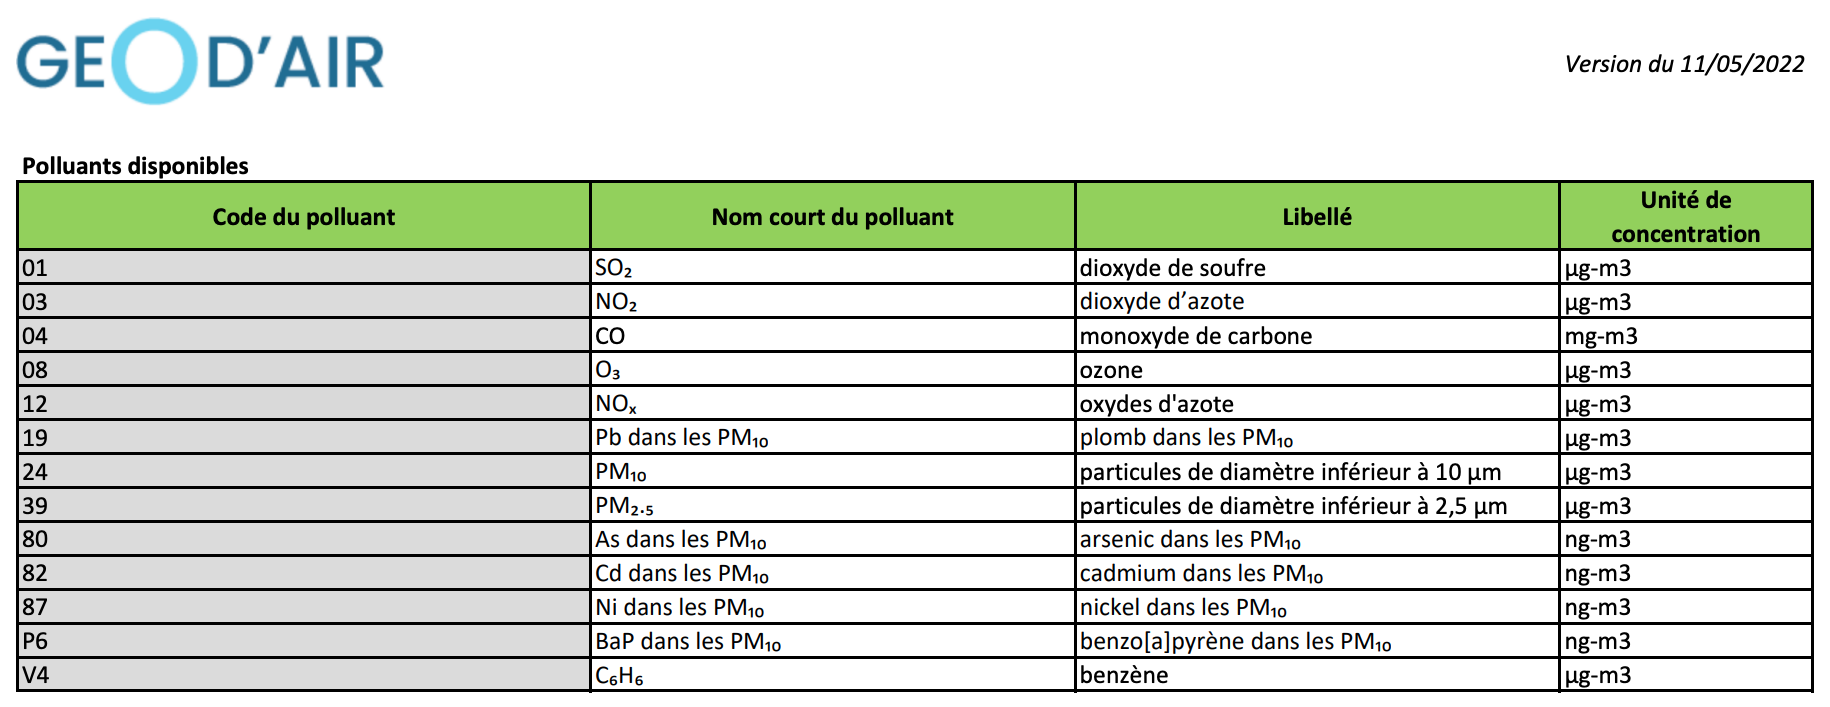

In [13]:
from IPython.display import Image

fig = Image(filename=('Geodair - Liste polluants.png'))
fig

## API - Moyenne journalière

### Requête

In [14]:
# API GET request

import requests

# Paramètres à choisir
date='2023-04-25'
polluant='03'
apikey=apikey_geodair

url_moy_j = f'https://www.geodair.fr/api-ext/MoyJ/export?date={date}&polluant={polluant}'
headers = {'accept': 'text/plain', 'apikey': apikey}

req = requests.get(url_moy_j, headers=headers)

In [15]:
# API Response headers

req.headers

{'Date': 'Wed, 17 May 2023 14:27:31 GMT', 'Content-Type': 'text/plain;charset=UTF-8', 'Content-Length': '92', 'Connection': 'keep-alive', 'X-RateLimit-Limit-Hour': '15', 'RateLimit-Remaining': '10', 'RateLimit-Reset': '1949', 'RateLimit-Limit': '15', 'X-RateLimit-Remaining-Hour': '10', 'X-Token-Expires-In': '34351.352018118', 'Vary': 'Origin, Access-Control-Request-Method, Access-Control-Request-Headers, Origin', 'X-XSS-Protection': '1; mode=block', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Pragma': 'no-cache', 'Expires': '0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-Auth-Token', 'X-Kong-Upstream-Latency': '6', 'X-Kong-Proxy-Latency': '1', 'Via': 'kong/2.6.0'}

In [16]:
# Obtenir l'ID du fichier à télécharger

id_fichier = req.content.decode('UTF-8')
id_fichier

'moyenne-journaliere-polluant-2023-04-25-03.608fdefa77dc-d4d4755d-c3a0-40e9-a635-98013931c745'

In [17]:
# Télécharger le fichier

url_download = f'https://www.geodair.fr/api-ext/download?id={id_fichier}'
headers = {'accept': 'application/octet-stream', 'apikey': apikey}

req_download = requests.get(url_download, headers=headers)

In [18]:
# API Response headers

req_download.headers

{'Date': 'Wed, 17 May 2023 14:27:31 GMT', 'Content-Type': 'application/octet-stream', 'Content-Length': '80663', 'Connection': 'keep-alive', 'X-RateLimit-Limit-Hour': '15', 'RateLimit-Remaining': '8', 'RateLimit-Reset': '1949', 'RateLimit-Limit': '15', 'X-RateLimit-Remaining-Hour': '8', 'X-Token-Expires-In': '34351.20638299', 'Vary': 'Origin, Access-Control-Request-Method, Access-Control-Request-Headers, Origin', 'Content-Disposition': 'attachment; filename="FR_E2_moyenne-journaliere-polluant-2023-04-25-03.608fdefa77dc-d4d4755d-c3a0-40e9-a635-98013931c745.csv"', 'X-XSS-Protection': '1; mode=block', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Pragma': 'no-cache', 'Expires': '0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-Auth-Token', 'X-Kong-Upstream-Latency': '3', 'X-Kong-Proxy-Latency': '1', 'Via': 'kong/2.6.0'}

In [19]:
# API data raw

data_moy_j = req_download.content.decode('UTF-8')

In [20]:
# API data into a Pandas DataFrame

df_moy_j = pd.read_csv(io.StringIO(data_moy_j), sep=";")

In [21]:
df_moy_j

Date de début          Date de fin                     Organisme   
0    2023/04/25 00:00:00  2023/04/25 23:59:59                ATMO GRAND EST  \
1    2023/04/25 00:00:00  2023/04/25 23:59:59                ATMO GRAND EST   
2    2023/04/25 00:00:00  2023/04/25 23:59:59                ATMO GRAND EST   
3    2023/04/25 00:00:00  2023/04/25 23:59:59                ATMO GRAND EST   
4    2023/04/25 00:00:00  2023/04/25 23:59:59                ATMO GRAND EST   
..                   ...                  ...                           ...   
375  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
376  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
377  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
378  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
379  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   

      code zas                         Zas code site             nom site   
0    FR44ZAG02                    ZAG METZ   FR01011          Metz-Centre  \
1    FR44ZAG02                    ZAG METZ   FR01012           Metz-Borny   
2    FR44ZRE01                ZR GRAND-EST   FR01016                Atton   
3    FR44ZAG02                    ZAG METZ   FR01018        Scy-Chazelles   
4    FR44ZAG02                    ZAG METZ   FR01020    Thionville-Centre   
..         ...                         ...       ...                  ...   
375  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82040          Dole centre   
376  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82041               Tavaux   
377  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82042             Damparis   
378  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82060  Vesoul Pres Caillet   
379  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82070      Baume-les-Dames   

        type d'implantation Polluant type d'influence  ...   
0                   Urbaine      NO2             Fond  ...  \
1                   Urbaine      NO2             Fond  ...   
2    Rurale près des villes      NO2     Industrielle  ...   
3               Périurbaine      NO2             Fond  ...   
4                   Urbaine      NO2             Fond  ...   
..                      ...      ...              ...  ...   
375                 Urbaine      NO2             Fond  ...   
376  Rurale près des villes      NO2     Industrielle  ...   
377  Rurale près des villes      NO2     Industrielle  ...   
378                 Urbaine      NO2             Fond  ...   
379                 Urbaine      NO2           Trafic  ...   

    procédure de mesure       type de valeur valeur  valeur brute   
0                   NaN  Moyenne journalière   13.0     12.529167  \
1                   NaN  Moyenne journalière   14.0     14.091304   
2                   NaN  Moyenne journalière    8.4      8.447826   
3                   NaN  Moyenne journalière    5.8      5.845833   
4                   NaN  Moyenne journalière   16.0     15.525000   
..                  ...                  ...    ...           ...   
375                 NaN  Moyenne journalière    8.7      8.708333   
376                 NaN  Moyenne journalière    2.1      2.070833   
377                 NaN  Moyenne journalière    4.2      4.170833   
378                 NaN  Moyenne journalière   10.0     10.204167   
379                 NaN  Moyenne journalière    9.3      9.270833   

    unité de mesure  taux de saisie  couverture temporelle   
0             µg-m3           100.0                    100  \
1             µg-m3            96.0                    100   
2             µg-m3            96.0                    100   
3             µg-m3           100.0                    100   
4             µg-m3           100.0                    100   
..              ...             ...                    ...   
375           µg-m3           100.0                    100   
376           µg-m3           100.0                    100   
377  

In [22]:
df_moy_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date de début          380 non-null    object 
 1   Date de fin            380 non-null    object 
 2   Organisme              380 non-null    object 
 3   code zas               380 non-null    object 
 4   Zas                    380 non-null    object 
 5   code site              380 non-null    object 
 6   nom site               380 non-null    object 
 7   type d'implantation    380 non-null    object 
 8   Polluant               380 non-null    object 
 9   type d'influence       380 non-null    object 
 10  discriminant           311 non-null    object 
 11  Réglementaire          380 non-null    object 
 12  type d'évaluation      380 non-null    object 
 13  procédure de mesure    0 non-null      float64
 14  type de valeur         380 non-null    object 
 15  valeur

In [23]:
df_moy_j_short = df_moy_j[[
    "Date de début",
    "Date de fin",
    "Organisme",
    "code site",
    "nom site",
    "type d'implantation",
    "Polluant",
    "type d'influence",
    "type d'évaluation",
    "valeur brute",
    "unité de mesure",
    "code qualité"]]
df_moy_j_short.head()

Date de début          Date de fin       Organisme code site   
0  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO GRAND EST   FR01011  \
1  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO GRAND EST   FR01012   
2  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO GRAND EST   FR01016   
3  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO GRAND EST   FR01018   
4  2023/04/25 00:00:00  2023/04/25 23:59:59  ATMO GRAND EST   FR01020   

            nom site     type d'implantation Polluant type d'influence   
0        Metz-Centre                 Urbaine      NO2             Fond  \
1         Metz-Borny                 Urbaine      NO2             Fond   
2              Atton  Rurale près des villes      NO2     Industrielle   
3      Scy-Chazelles             Périurbaine      NO2             Fond   
4  Thionville-Centre                 Urbaine      NO2             Fond   

     type d'évaluation  valeur brute unité de mesure code qualité  
0        mesures fixes     12.529167           µg-m3            A  
1        mesures fixes     14.091304           µg-m3            A  
2        mesures fixes      8.447826           µg-m3            A  
3  mesures indicatives      5.845833           µg-m3            A  
4        mesures fixes     15.525000           µg-m3            A

## API - Moyenne horaire

In [24]:
# API GET request

import requests

# Paramètres à choisir
date='2023-04-25'
polluant='03'
apikey=apikey_geodair

url_moy_h = f'https://www.geodair.fr/api-ext/MoyH/export?date={date}&polluant={polluant}'
headers = {'accept': 'text/plain', 'apikey': apikey}

req = requests.get(url_moy_h, headers=headers)

In [25]:
# API Response headers

req.headers

{'Date': 'Wed, 17 May 2023 14:27:31 GMT', 'Content-Type': 'text/plain;charset=UTF-8', 'Content-Length': '88', 'Connection': 'keep-alive', 'X-RateLimit-Limit-Hour': '15', 'RateLimit-Remaining': '11', 'RateLimit-Reset': '1949', 'RateLimit-Limit': '15', 'X-RateLimit-Remaining-Hour': '11', 'X-Token-Expires-In': '34350.913041115', 'Vary': 'Origin, Access-Control-Request-Method, Access-Control-Request-Headers, Origin', 'X-XSS-Protection': '1; mode=block', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Pragma': 'no-cache', 'Expires': '0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-Auth-Token', 'X-Kong-Upstream-Latency': '5', 'X-Kong-Proxy-Latency': '0', 'Via': 'kong/2.6.0'}

In [26]:
# Obtenir l'ID du fichier à télécharger

id_fichier = req.content.decode('UTF-8')
id_fichier

'moyenne-horaire-polluant-2023-04-25-03.63c482942b77-81198b9e-e295-40e8-b21b-dbe78d2a30ee'

In [27]:
# Télécharger le fichier

url_download = f'https://www.geodair.fr/api-ext/download?id={id_fichier}'
headers = {'accept': 'application/octet-stream', 'apikey': apikey}

req_download = requests.get(url_download, headers=headers)

In [28]:
# API Response headers

req_download.headers

{'Date': 'Wed, 17 May 2023 14:27:31 GMT', 'Content-Type': 'application/octet-stream', 'Content-Length': '2035232', 'Connection': 'keep-alive', 'X-RateLimit-Limit-Hour': '15', 'RateLimit-Remaining': '7', 'RateLimit-Reset': '1949', 'RateLimit-Limit': '15', 'X-RateLimit-Remaining-Hour': '7', 'X-Token-Expires-In': '34350.771842003', 'Vary': 'Origin, Access-Control-Request-Method, Access-Control-Request-Headers, Origin', 'Content-Disposition': 'attachment; filename="FR_E2_moyenne-horaire-polluant-2023-04-25-03.63c482942b77-81198b9e-e295-40e8-b21b-dbe78d2a30ee.csv"', 'X-XSS-Protection': '1; mode=block', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Pragma': 'no-cache', 'Expires': '0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-Auth-Token', 'X-Kong-Upstream-Latency': '9', 'X-Kong-Proxy-Latency': '1', 'Via': 'kong/2.6.0'}

In [29]:
# API data raw

data_moy_h = req_download.content.decode('UTF-8')

In [30]:
# API data into a Pandas DataFrame

df_moy_h = pd.read_csv(io.StringIO(data_moy_h), sep=";")

In [31]:
df_moy_h

Date de début          Date de fin                     Organisme   
0     2023/04/25 00:00:00  2023/04/25 01:00:00                ATMO GRAND EST  \
1     2023/04/25 01:00:00  2023/04/25 02:00:00                ATMO GRAND EST   
2     2023/04/25 02:00:00  2023/04/25 03:00:00                ATMO GRAND EST   
3     2023/04/25 03:00:00  2023/04/25 04:00:00                ATMO GRAND EST   
4     2023/04/25 04:00:00  2023/04/25 05:00:00                ATMO GRAND EST   
...                   ...                  ...                           ...   
9115  2023/04/25 19:00:00  2023/04/25 20:00:00  ATMO BOURGOGNE-FRANCHE-COMTE   
9116  2023/04/25 20:00:00  2023/04/25 21:00:00  ATMO BOURGOGNE-FRANCHE-COMTE   
9117  2023/04/25 21:00:00  2023/04/25 22:00:00  ATMO BOURGOGNE-FRANCHE-COMTE   
9118  2023/04/25 22:00:00  2023/04/25 23:00:00  ATMO BOURGOGNE-FRANCHE-COMTE   
9119  2023/04/25 23:00:00  2023/04/26 00:00:00  ATMO BOURGOGNE-FRANCHE-COMTE   

       code zas                         Zas code site         nom site   
0     FR44ZAG02                    ZAG METZ   FR01011      Metz-Centre  \
1     FR44ZAG02                    ZAG METZ   FR01011      Metz-Centre   
2     FR44ZAG02                    ZAG METZ   FR01011      Metz-Centre   
3     FR44ZAG02                    ZAG METZ   FR01011      Metz-Centre   
4     FR44ZAG02                    ZAG METZ   FR01011      Metz-Centre   
...         ...                         ...       ...              ...   
9115  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82070  Baume-les-Dames   
9116  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82070  Baume-les-Dames   
9117  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82070  Baume-les-Dames   
9118  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82070  Baume-les-Dames   
9119  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82070  Baume-les-Dames   

     type d'implantation Polluant type d'influence  ...   
0                Urbaine      NO2             Fond  ...  \
1                Urbaine      NO2             Fond  ...   
2                Urbaine      NO2             Fond  ...   
3                Urbaine      NO2             Fond  ...   
4                Urbaine      NO2             Fond  ...   
...                  ...      ...              ...  ...   
9115             Urbaine      NO2           Trafic  ...   
9116             Urbaine      NO2           Trafic  ...   
9117             Urbaine      NO2           Trafic  ...   
9118             Urbaine      NO2           Trafic  ...   
9119             Urbaine      NO2           Trafic  ...   

                 procédure de mesure           type de valeur valeur   
0     Auto NO2_NOx Conf meth CHIMILU  moyenne horaire validée    5.3  \
1     Auto NO2_NOx Conf meth CHIMILU  moyenne horaire validée    5.3   
2     Auto NO2_NOx Conf meth CHIMILU  moyenne horaire validée    6.5   
3     Auto NO2_NOx Conf meth CHIMILU  moyenne horaire validée    7.4   
4     Auto NO2_NOx Conf meth CHIMILU  moyenne horaire validée    9.1   
...                              ...                      ...    ...   
9115            Auto NO2_NOx app 42i  moyenne horaire validée    6.0   
9116            Auto NO2_NOx app 42i  moyenne horaire validée    5.7   
9117            Auto NO2_NOx app 42i  moyenne horaire validée    6.3   
9118            Auto NO2_NOx app 42i  moyenne horaire validée    3.5   
9119            Auto NO2_NOx app 42i  moyenne horaire validée    2.6   

     valeur brute unité de mesure  taux de saisie  couverture temporelle   
0           5.300           µg-m3             NaN                    NaN  \
1           5.325           µg-m3             NaN                    NaN   
2           6.450           µg-m3             NaN                    NaN   
3           7.400           µg-m3             NaN                    NaN   
4           9.050           µg-m3             NaN                    NaN   
...           ...             ...             ...                    ...   
9115        5.950           µg/m3             NaN       

# Bâtiments du CSTB

In [32]:
cstb_file = '../../data/cstb/API2BUILD_COORD_DATES_BATI.xlsx'
df_cstb = pd.read_excel(cstb_file)

In [33]:
df_cstb

Identifiant  Longitude   Latitude Date_debut_enquete Date_fin_enquete
0           B001   5.365996  43.314652         2016-11-29              NaT
1           B002   5.389293  43.310217         2016-11-25              NaT
2           B003   5.369872  43.310963         2016-12-16              NaT
3           B004   5.379358  43.286702         2017-06-12              NaT
4           B005   5.041559  43.417900         2017-06-06              NaT
...          ...        ...        ...                ...              ...
1101        L568   2.273457  48.825051         2022-11-08       2022-11-15
1102        L569   2.847896  49.990562         2022-09-02       2022-09-09
1103        L570   2.158504  48.940902         2022-09-01       2022-09-08
1104        L571   1.879346  48.757418         2022-04-04       2022-04-11
1105        L572   2.158504  48.940902         2022-07-28       2022-08-04

[1106 rows x 5 columns]

## Description

In [34]:
# Df % de null

round(df_cstb.isnull().sum()/len(df_cstb)*100,1)

Identifiant            0.0
Longitude              0.0
Latitude               0.0
Date_debut_enquete     0.0
Date_fin_enquete      11.7
dtype: float64

# Script

In [35]:
# Liste stations CSTB
df_immeubles_cstb = df_cstb.copy()
df_immeubles_cstb

Identifiant  Longitude   Latitude Date_debut_enquete Date_fin_enquete
0           B001   5.365996  43.314652         2016-11-29              NaT
1           B002   5.389293  43.310217         2016-11-25              NaT
2           B003   5.369872  43.310963         2016-12-16              NaT
3           B004   5.379358  43.286702         2017-06-12              NaT
4           B005   5.041559  43.417900         2017-06-06              NaT
...          ...        ...        ...                ...              ...
1101        L568   2.273457  48.825051         2022-11-08       2022-11-15
1102        L569   2.847896  49.990562         2022-09-02       2022-09-09
1103        L570   2.158504  48.940902         2022-09-01       2022-09-08
1104        L571   1.879346  48.757418         2022-04-04       2022-04-11
1105        L572   2.158504  48.940902         2022-07-28       2022-08-04

[1106 rows x 5 columns]

In [36]:
# Liste stations Geod'air
df_stations_geodair

Type de site     Code                    Alias  Longitude   Latitude   
0      classique  FR28028            Bethune Stade   2.635692  50.535385  \
1      classique  FR38024                      RDT  55.302844 -21.213212   
2      classique  FR07056                      NaN   4.226006  44.983770   
3      classique  FR02043                Marignane   5.222281  43.416531   
4      classique  FR34043               Oysonville   1.955611  48.391139   
..           ...      ...                      ...        ...        ...   
559    classique  FR12047       BESSIERES ECONOTRE   1.595475  43.803139   
560    classique  FR22009  Pays Naborien (Carling)   6.716886  49.165726   
561    classique  FR08018      Montpellier St Gely   3.800210  43.692600   
562    classique  FR05074     Le Havre Ec. Herriot   0.100703  49.489630   
563    classique  FR16001                STG Ouest   7.708917  48.608818   

               Implantation      Mobilité  
0                   Urbaine  Station Fixe  
1    Rurale près des villes  Station Fixe  
2          Rurale régionale  Station Fixe  
3                   Urbaine  Station Fixe  
4          Rurale régionale  Station Fixe  
..                      ...           ...  
559  Rurale près des villes  Station Fixe  
560             Périurbaine  Station Fixe  
561             Périurbaine  Station Fixe  
562                 Urbaine  Station Fixe  
563             Périurbaine  Station Fixe  

[564 rows x 7 columns]

## 10 stations Geod'air les plus proches

In [37]:
from math import radians, cos, sin, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculer la distance haversine entre 2 points en kilomètres
    """
    
    R = 6371  # rayon de la Terre en km
    phi1 = radians(lat1)
    phi2 = radians(lat2)
    delta_phi = radians(lat2 - lat1)
    delta_lambda = radians(lon2 - lon1)
    
    a = sin(delta_phi / 2) ** 2 + cos(phi1) * cos(phi2) * sin(delta_lambda / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    d = R * c
    
    return d

# Calculer la distance haversine de chaque immeuble CSTB avec toutes les stations Geod'air

distances_df = pd.DataFrame()

for _, immeuble in df_immeubles_cstb.iterrows():
    distances = []
    
    for _, station in df_stations_geodair.iterrows():
        distance = haversine(immeuble['Latitude'], immeuble['Longitude'],
                             station['Latitude'], station['Longitude'])
        distances.append(distance)
        
    distances_df[immeuble['Identifiant']] = distances


/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[immeuble['Identifiant']] = distances
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1083453983.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

In [38]:
distances_df

B001         B002         B003         B004         B005   
0     829.093880   830.014747   829.566041   832.368348   812.084963  \
1    8800.361714  8798.653598  8799.851916  8797.440350  8827.323985   
2     206.680379   207.947588   207.186138   209.950058   185.855433   
3      16.226448    17.945259    16.737670    19.227852    14.597412   
4     623.055469   624.270703   623.557577   626.335229   602.216842   
..           ...          ...          ...          ...          ...   
559   308.613813   310.559124   309.002744   310.302809   280.710643   
560   658.821857   659.030579   659.180802   661.735096   651.916627   
561   133.092108   135.035100   133.522272   135.148834   104.591403   
562   796.065152   797.400897   796.575481   799.311920   773.601447   
563   615.828890   615.777210   616.135046   618.512368   612.753584   

            B006         B007         B008         B009         B010  ...   
0     562.435227   560.994611   562.887761   440.412484   440.051074  ...  \
1    9395.393012  9395.850725  9394.790756  9067.977144  9068.291468  ...   
2     438.329133   438.201732   437.916649   286.704654   287.025283  ...   
3     587.579643   587.795908   587.046523   430.538640   430.922866  ...   
4     342.457166   341.106144   342.772003   327.633547   327.423363  ...   
..           ...          ...          ...          ...          ...  ...   
559   338.739970   339.447390   338.083312   514.305849   514.557723  ...   
560   677.913190   676.753546   678.051756   219.557376   219.184928  ...   
561   476.033187   476.359162   475.467325   431.118577   431.458370  ...   
562   383.237508   381.792133   383.810259   501.849710   501.596130  ...   
563   720.799893   719.756093   720.854149   197.528603   197.256050  ...   

            L563         L564         L565         L566         L567   
0     196.023879   190.869341   185.833766   196.023879    62.431075  \
1    9396.616127  9396.357034  9396.512456  9396.616127  9445.605209   
2     453.658455   456.294726   459.203701   453.658455   566.250593   
3     644.648991   647.128000   649.876793   644.648991   752.981576   
4      47.551348    53.086159    58.587102    47.551348   189.296044   
..           ...          ...          ...          ...          ...   
559   557.510595   562.312624   567.118127   557.510595   694.531631   
560   337.319201   332.426947   328.102469   337.319201   293.604164   
561   582.657313   586.038942   589.603775   582.657313   704.020743   
562   165.930128   167.714170   169.211736   165.930128   205.108231   
563   410.102487   405.906428   402.293536   410.102487   384.410645   

            L568         L569         L570         L571         L572  
0     191.957305    62.431075   180.583252   205.060609   180.583252  
1    9390.151597  9445.605209  9404.983847  9406.836362  9404.983847  
2     452.113604   566.250593   467.101501   455.897395   467.101501  
3     642.781356   752.981576   657.871668   647.259949   657.871668  
4      53.610057   189.296044    62.920434    41.113098    62.920434  
..           ...          ...          ...          ...          ...  
559   560.826971   694.531631   572.919180   551.321378   572.919180  
560   326.337540   293.604164   333.068344   356.016295   333.068344  
561   582.613881   704.020743   597.008527   582.192099   597.008527  
562   174.420233   205.108231   161.434980   152.902954   161.434980  
563   399.406615   384.410645   408.312580   428.183095   408.312580  

[564 rows x 1106 columns]

In [39]:
# Pour chaque immeuble CSTB, obtenir les 10 stations Geod'air les plus proches

closest10_stations_df_code = pd.DataFrame()
closest10_stations_df_km = pd.DataFrame()

for immeuble_cstb in df_immeubles_cstb['Identifiant']:
    distances = distances_df[immeuble_cstb].sort_values()
    
    closest10_stations_code = []
    closest10_stations_km = []
    
    for i in range(10):
        geodair_station_id = df_stations_geodair.loc[distances.index[i], 'Code']
        closest10_stations_code.append(geodair_station_id)
        
        closest10_stations_km.append(distances.iloc[i])
        
    closest10_stations_df_code[immeuble_cstb] = closest10_stations_code
    closest10_stations_df_km[immeuble_cstb] = closest10_stations_km

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_code[immeuble_cstb] = closest10_stations_code
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_km[immeuble_cstb] = closest10_stations_km
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is 

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_code[immeuble_cstb] = closest10_stations_code
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_km[immeuble_cstb] = closest10_stations_km
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is 

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_code[immeuble_cstb] = closest10_stations_code
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_km[immeuble_cstb] = closest10_stations_km
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is 

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_code[immeuble_cstb] = closest10_stations_code
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_km[immeuble_cstb] = closest10_stations_km
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is 

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_code[immeuble_cstb] = closest10_stations_code
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_km[immeuble_cstb] = closest10_stations_km
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is 

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_code[immeuble_cstb] = closest10_stations_code
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  closest10_stations_df_km[immeuble_cstb] = closest10_stations_km
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1267652781.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [40]:
closest10_stations_df_code

B001     B002     B003     B004     B005     B006     B007     B008   
0  FR03043  FR03043  FR03043  FR03006  FR02004  FR09003  FR09003  FR09003  \
1  FR03014  FR03006  FR03014  FR03043  FR02028  FR09008  FR09008  FR09008   
2  FR03006  FR03014  FR03006  FR03014  FR02008  FR09203  FR09203  FR09203   
3  FR03037  FR03037  FR03037  FR03037  FR02029  FR09303  FR09303  FR09303   
4  FR02043  FR03032  FR03032  FR03032  FR02007  FR09305  FR09305  FR09305   
5  FR03032  FR03030  FR02043  FR02043  FR02006  FR09302  FR09302  FR09302   
6  FR03030  FR02043  FR03030  FR03030  FR02011  FR23152  FR23152  FR23152   
7  FR02021  FR02021  FR02021  FR02021  FR02013  FR23124  FR23124  FR23124   
8  FR02029  FR03021  FR02029  FR02029  FR02012  FR23078  FR23078  FR23078   
9  FR03021  FR02029  FR03021  FR03021  FR02021  FR09304  FR09304  FR09304   

      B009     B010  ...     L563     L564     L565     L566     L567   
0  FR82006  FR82006  ...  FR04029  FR04179  FR04150  FR04029  FR18045  \
1  FR82001  FR82001  ...  FR04179  FR04029  FR04017  FR04179  FR18042   
2  FR82005  FR82005  ...  FR04150  FR04150  FR04060  FR04150  FR18080   
3  FR26114  FR26114  ...  FR04060  FR04017  FR04031  FR04060  FR28022   
4  FR82070  FR82070  ...  FR04017  FR04060  FR04179  FR04017  FR18053   
5  FR82043  FR82043  ...  FR04049  FR04031  FR04002  FR04049  FR18079   
6  FR82040  FR82040  ...  FR04012  FR04012  FR04131  FR04012  FR18035   
7  FR82060  FR82060  ...  FR04031  FR04071  FR04118  FR04031  FR06003   
8  FR82042  FR82042  ...  FR04071  FR04131  FR04051  FR04071  FR28115   
9  FR82041  FR82041  ...  FR04118  FR04118  FR04071  FR04118  FR28010   

      L568     L569     L570     L571     L572  
0  FR04179  FR18045  FR04051  FR04181  FR04051  
1  FR04060  FR18042  FR04150  FR04029  FR04150  
2  FR04012  FR18080  FR04002  FR04038  FR04002  
3  FR04031  FR28022  FR04017  FR04049  FR04017  
4  FR04071  FR18053  FR04060  FR04331  FR04060  
5  FR04017  FR18079  FR04031  FR04063  FR04031  
6  FR04037  FR18035  FR04023  FR04179  FR04023  
7  FR04118  FR06003  FR04058  FR04150  FR04058  
8  FR04055  FR28115  FR04131  FR04180  FR04131  
9  FR04131  FR28010  FR04179  FR04060  FR04179  

[10 rows x 1106 columns]

In [41]:
closest10_stations_df_km

B001       B002       B003       B004       B005        B006   
0   2.546476   0.702204   2.106949   1.850120   0.167111    1.657120  \
1   3.743729   3.810966   4.198500   2.411541   3.680957    3.241721   
2   4.948423   4.823265   4.435722   6.996668   5.133624    4.595279   
3  12.270026  10.322771  11.857035  10.693344   6.137501   55.135066   
4  16.226448  15.081891  16.651681  15.785088   6.500747   56.472010   
5  17.015497  17.124324  16.737670  19.227852   6.713874   58.473970   
6  17.459932  17.945259  17.683286  19.853263   8.098220   60.999505   
7  20.170523  22.095424  20.524455  21.743375   9.768832   64.793648   
8  22.511793  24.250644  22.970194  24.912898  10.895315  102.898546   
9  24.213915  24.431673  24.526220  26.973590  11.432972  108.366830   

         B007        B008       B009       B010  ...       L563       L564   
0    0.490297    2.308166   1.053717   1.251146  ...   0.562673   6.361774  \
1    3.669285    2.777591   2.232074   2.551101  ...  10.901557   6.377889   
2    4.835714    5.078185   5.874987   6.047747  ...  12.839069   6.659928   
3   54.192815   55.133365  12.805967  13.082888  ...  13.577066   7.967987   
4   55.506786   56.484484  29.263873  29.160425  ...  14.058418   8.037556   
5   57.989157   58.224378  35.543099  35.621556  ...  14.090248   9.673027   
6   59.908775   61.696561  41.813416  41.927320  ...  14.948381  10.553089   
7   63.355284   65.243311  42.827367  42.460768  ...  15.383270  11.058415   
8  101.461230  103.487120  48.853265  48.971821  ...  16.360349  11.099774   
9  107.053567  108.643488  50.938925  51.071327  ...  16.791689  11.160772   

       L565       L566       L567      L568       L569       L570       L571   
0  0.848142   0.562673  32.847896  0.648300  32.847896   4.895682  14.212567  \
1  3.026038  10.901557  34.849155  3.858521  34.849155   8.140158  18.983689   
2  5.099630  12.839069  35.120188  3.967788  35.120188  10.027464  19.514071   
3  5.745414  13.577066  35.510676  5.629741  35.510676  10.960105  22.716682   
4  6.447562  14.058418  40.112510  5.710609  40.112510  13.554059  26.966459   
5  6.598578  14.090248  42.384058  6.273663  42.384058  13.780094  29.527949   
6  6.934686  14.948381  45.580568  6.367932  45.580568  14.440741  29.736303   
7  7.160506  15.383270  45.814048  6.629655  45.814048  14.579381  30.350503   
8  7.539168  16.360349  48.715222  6.641291  48.715222  14.630834  31.374725   
9  7.830653  16.791689  51.126074  6.790390  51.126074  14.742451  32.281365   

        L572  
0   4.895682  
1   8.140158  
2  10.027464  
3  10.960105  
4  13.554059  
5  13.780094  
6  14.440741  
7  14.579381  
8  14.630834  
9  14.742451  

[10 rows x 1106 columns]

## Table détaillée top 10 par station - V1

In [42]:
identifiant_immeuble_cstb = 'B001' # Mettre identifiant bâtiment CSTB

imm_cstb_desc = df_immeubles_cstb[df_immeubles_cstb['Identifiant']==identifiant_immeuble_cstb]
imm_cstb_desc

Identifiant  Longitude   Latitude Date_debut_enquete Date_fin_enquete
0        B001   5.365996  43.314652         2016-11-29              NaT

In [43]:
df_stations_geodair.head(20)

Type de site     Code                       Alias  Longitude   Latitude   
0     classique  FR28028               Bethune Stade   2.635692  50.535385  \
1     classique  FR38024                         RDT  55.302844 -21.213212   
2     classique  FR07056                         NaN   4.226006  44.983770   
3     classique  FR02043                   Marignane   5.222281  43.416531   
4     classique  FR34043                  Oysonville   1.955611  48.391139   
5     classique  FR09003             place de VERDUN  -1.153603  46.162556   
6     classique  FR04331                       LIMAY   1.754142  48.985523   
7     classique  FR04100                 VILLEMOMBLE   2.507222  48.881947   
8     classique  FR04063             MANTES-LA-JOLIE   1.703300  48.996400   
9     classique  FR06134                 Saint Amand   3.427940  50.456470   
10    classique  FR34041                     Fulbert   1.510139  48.444417   
11    classique  FR31001                  GRAND PARC  -0.579444  44.861390   
12    classique  FR20060          VENISSIEUX Village   4.883600  45.703600   
13    classique  FR11016                   Marcq CTM   3.076560  50.670030   
14    classique  FR31020                        LACQ  -0.616944  43.410557   
15    classique  FR01014              Pont-à-Mousson   6.058336  48.915000   
16    classique  FR28034  ISBERGUES impasse Vandaele   2.473228  50.625758   
17    classique  FR35006                TULLE - Hugo   1.760000  45.260000   
18    classique  FR02020            Rognac les Brets   5.220046  43.510802   
19    classique  FR08617           Nimes La Calmette   4.265810  43.925400   

              Implantation        Mobilité  
0                  Urbaine    Station Fixe  
1   Rurale près des villes    Station Fixe  
2         Rurale régionale    Station Fixe  
3                  Urbaine    Station Fixe  
4         Rurale régionale    Station Fixe  
5                  Urbaine    Station Fixe  
6              Périurbaine    Station Fixe  
7                  Urbaine    Station Fixe  
8              Périurbaine    Station Fixe  
9              Périurbaine    Station Fixe  
10                 Urbaine    Station Fixe  
11                 Urbaine    Station Fixe  
12                 Urbaine    Station Fixe  
13                 Urbaine    Station Fixe  
14  Rurale près des villes    Station Fixe  
15                 Urbaine    Station Fixe  
16  Rurale près des villes  Station Mobile  
17                 Urbaine    Station Fixe  
18             Périurbaine    Station Fixe  
19             Périurbaine    Station Fixe

In [44]:
# Pas terminé, problème avec :
# substances et concentrations mesurées, période de mesure, indicateur(s) de qualité des mesures, limites de détection et quantification.
cstb_top10stationsGeodair = pd.DataFrame(columns=[
    'Geodair_Code',
    'Geodair_Longitude',
    'Geodair_Latitude',
    'Geodair_DistanceToCSTBBuilding',
    'Geodair_Implantation',
    'Geodair_Mobilité'
    ])

for geodair_station_id in closest10_stations_df_code[identifiant_immeuble_cstb]:
    geodair_station_list = []
    geodair_station_list.append(geodair_station_id)
    geodair_station_list.append(df_stations_geodair[df_stations_geodair['Code']==geodair_station_id]['Longitude'].iloc[0])
    geodair_station_list.append(df_stations_geodair[df_stations_geodair['Code']==geodair_station_id]['Latitude'].iloc[0])

    index_station = closest10_stations_df_code.index[closest10_stations_df_code[identifiant_immeuble_cstb]==geodair_station_id][0]
    geodair_station_list.append(closest10_stations_df_km[identifiant_immeuble_cstb].iloc[index_station])
    
    geodair_station_list.append(df_stations_geodair[df_stations_geodair['Code']==geodair_station_id]['Implantation'].iloc[0])
    geodair_station_list.append(df_stations_geodair[df_stations_geodair['Code']==geodair_station_id]['Mobilité'].iloc[0])
        
    cstb_top10stationsGeodair.loc[len(cstb_top10stationsGeodair)] = geodair_station_list
cstb_top10stationsGeodair


Geodair_Code  Geodair_Longitude  Geodair_Latitude   
0      FR03043           5.394716         43.305287  \
1      FR03014           5.360119         43.348048   
2      FR03006           5.397360         43.276451   
3      FR03037           5.511384         43.283341   
4      FR02043           5.222281         43.416531   
5      FR03032           5.574184         43.293138   
6      FR03030           5.466672         43.453584   
7      FR02021           5.117696         43.331245   
8      FR02029           5.113214         43.399546   
9      FR03021           5.448164         43.524075   

   Geodair_DistanceToCSTBBuilding Geodair_Implantation Geodair_Mobilité  
0                        2.546476              Urbaine     Station Fixe  
1                        3.743729              Urbaine     Station Fixe  
2                        4.948423              Urbaine     Station Fixe  
3                       12.270026          Périurbaine     Station Fixe  
4                       16.226448              Urbaine     Station Fixe  
5                       17.015497              Urbaine     Station Fixe  
6                       17.459932          Périurbaine     Station Fixe  
7                       20.170523          Périurbaine     Station Fixe  
8                       22.511793          Périurbaine     Station Fixe  
9                       24.213915              Urbaine     Station Fixe

- **Problème 1** : concernant la distinction pollution de fond / de proximité, elle se fait au niveau du polluant, pas de la station. Donc top 10 stations "tout court", pas possible d'obtenir top 3 stations de fond, mais j'ai ajouté info "Implantation". *Réponse: Je mets en pause la notion de station de fond / de proximité (vu qu'elle est au niveau des polluants et pas des stations).*

- **Problème 2** : je suis parvenu à :
    - récupérer les 10 stations Geodair les plus proches de chaque bâtiment CSTB
    - faire la description de chaque bâtiment
    - commencer la table structurée des infos des 10 stations Geodair les plus proches de chaque bâtiment.
> Cependant, nous allons avoir un problème de disponibilité de l'API pour les infos des polluants : il y a 13 polluants et 10 stations Geodair à consulter, il faut donc faire 130 interrogation API pour obtenir toutes les infos pour 1 bâtiment CSTB (il y en a 1106).
**Comment faire ?**
*Réponse* :
> - *Récupération des données sur la période d’enquête d’intérêt, pour le **NO2, PM2.5, PM10 et benzène (C6H6).***
> - *Ensuite, on doit voir comment faire techniquement : télécharger et stocker les fichier 1 fois, avec actualisation quotidienne pour télécharger chaque nouveau fichier ?*

## Obtention données polluants

### Infos

In [45]:
df_immeubles_cstb2 = df_immeubles_cstb.copy()
df_immeubles_cstb2

Identifiant  Longitude   Latitude Date_debut_enquete Date_fin_enquete
0           B001   5.365996  43.314652         2016-11-29              NaT
1           B002   5.389293  43.310217         2016-11-25              NaT
2           B003   5.369872  43.310963         2016-12-16              NaT
3           B004   5.379358  43.286702         2017-06-12              NaT
4           B005   5.041559  43.417900         2017-06-06              NaT
...          ...        ...        ...                ...              ...
1101        L568   2.273457  48.825051         2022-11-08       2022-11-15
1102        L569   2.847896  49.990562         2022-09-02       2022-09-09
1103        L570   2.158504  48.940902         2022-09-01       2022-09-08
1104        L571   1.879346  48.757418         2022-04-04       2022-04-11
1105        L572   2.158504  48.940902         2022-07-28       2022-08-04

[1106 rows x 5 columns]

In [46]:
df_immeubles_cstb2['Date_debut_enquete'] = pd.to_datetime(df_immeubles_cstb2['Date_debut_enquete'])

In [47]:
print(f"Min start : {min(df_immeubles_cstb2['Date_debut_enquete'])}")
print(f"Max start : {max(df_immeubles_cstb2['Date_debut_enquete'])}")
print(f"Min end : {min(df_immeubles_cstb2['Date_fin_enquete'])}")
print(f"Max end : {max(df_immeubles_cstb2['Date_fin_enquete'])}")

Min start : 2013-06-17 00:00:00
Max start : 2023-02-22 00:00:00
Min end : NaT
Max end : NaT


### NO2

In [48]:
!cd && cd ../.. && cd Volumes/NO\ NAME/API2Build/data/geodair/NO2 && ls

Export Moy. journalière - NO₂ - 2013-06-15 00_00 - 2014-01-01 00_00.csv
Export Moy. journalière - NO₂ - 2014-01-01 00_00 - 2014-07-01 00_00.csv
Export Moy. journalière - NO₂ - 2014-07-01 00_00 - 2015-01-01 00_00.csv
Export Moy. journalière - NO₂ - 2015-01-01 00_00 - 2015-07-01 00_00.csv
Export Moy. journalière - NO₂ - 2015-07-01 00_00 - 2016-01-01 00_00.csv
Export Moy. journalière - NO₂ - 2016-01-01 00_00 - 2016-07-01 00_00.csv
Export Moy. journalière - NO₂ - 2016-07-01 00_00 - 2017-01-01 00_00.csv
Export Moy. journalière - NO₂ - 2017-01-01 00_00 - 2017-07-01 00_00.csv
Export Moy. journalière - NO₂ - 2017-07-01 00_00 - 2018-01-01 00_00.csv
Export Moy. journalière - NO₂ - 2018-01-01 00_00 - 2018-07-01 00_00.csv
Export Moy. journalière - NO₂ - 2018-07-01 00_00 - 2019-01-01 00_00.csv
Export Moy. journalière - NO₂ - 2019-01-01 00_00 - 2019-07-01 00_00.csv
Export Moy. journalière - NO₂ - 2019-07-01 00_00 - 2020-01-01 00_00.csv
Export Moy. journalière - NO₂ - 2020-01-01 00_00 -

In [49]:
no2_path = '/Volumes/NO NAME/API2Build/data/geodair/NO2'

In [50]:
df1 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2013-06-15 00_00 - 2014-01-01 00_00.csv', sep=";")
df2 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2014-01-01 00_00 - 2014-07-01 00_00.csv', sep=";")
df3 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2014-07-01 00_00 - 2015-01-01 00_00.csv', sep=";")
df4 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2015-01-01 00_00 - 2015-07-01 00_00.csv', sep=";")
df5 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2015-07-01 00_00 - 2016-01-01 00_00.csv', sep=";")
df6 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2016-01-01 00_00 - 2016-07-01 00_00.csv', sep=";")
df7 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2016-07-01 00_00 - 2017-01-01 00_00.csv', sep=";")
df8 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2017-01-01 00_00 - 2017-07-01 00_00.csv', sep=";")
df9 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2017-07-01 00_00 - 2018-01-01 00_00.csv', sep=";")
df10 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2018-01-01 00_00 - 2018-07-01 00_00.csv', sep=";")
df11 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2018-07-01 00_00 - 2019-01-01 00_00.csv', sep=";")
df12 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2019-01-01 00_00 - 2019-07-01 00_00.csv', sep=";")
df13 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2019-07-01 00_00 - 2020-01-01 00_00.csv', sep=";")
df14 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2020-01-01 00_00 - 2020-07-01 00_00.csv', sep=";")
df15 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2020-07-01 00_00 - 2021-01-01 00_00.csv', sep=";")
df16 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2021-01-01 00_00 - 2021-07-01 00_00.csv', sep=";")
df17 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2021-07-01 00_00 - 2022-01-01 00_00.csv', sep=";")
df18 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2022-01-01 00_00 - 2022-07-01 00_00.csv', sep=";")
df19 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2022-07-01 00_00 - 2023-01-01 00_00.csv', sep=";")
df20 = pd.read_csv(f'{no2_path}/Export Moy. journalière - NO₂ - 2023-01-01 00_00 - 2023-03-01 00_00.csv', sep=";")

In [51]:
NO2_data_full = pd.concat([df1,
                      df2,
                      df3,
                      df4,
                      df5,
                      df6,
                      df7,
                      df8,
                      df9,
                      df10,
                      df11,
                      df12,
                      df13,
                      df14,
                      df15,
                      df16,
                      df17,
                      df18,
                      df19,
                      df20], axis=0)

In [52]:
NO2_data_full.head()

Date de début          Date de fin       Organisme code zas   
0  2013/06/15 00:00:00  2013/06/15 23:59:59  ATMO GRAND EST  FR01N20  \
1  2013/06/15 00:00:00  2013/06/15 23:59:59  ATMO GRAND EST  FR01N20   
2  2013/06/15 00:00:00  2013/06/15 23:59:59  ATMO GRAND EST  FR01A01   
3  2013/06/15 00:00:00  2013/06/15 23:59:59  ATMO GRAND EST  FR01A01   
4  2013/06/15 00:00:00  2013/06/15 23:59:59  ATMO GRAND EST  FR01A01   

             Zas code site           nom site type d'implantation Polluant   
0    LORRAINE-ZR   FR01001  Longlaville-Ecole         Périurbaine      NO2  \
1    LORRAINE-ZR   FR01004           Distroff    Rurale régionale      NO2   
2  LORRAINE-METZ   FR01005            Hayange         Périurbaine      NO2   
3  LORRAINE-METZ   FR01011        Metz-Centre             Urbaine      NO2   
4  LORRAINE-METZ   FR01012         Metz-Borny             Urbaine      NO2   

  type d'influence  ... valeur valeur brute unité de mesure  taux de saisie   
0             Fond  ...    4.7     4.725000           µg-m3           100.0  \
1             Fond  ...    0.0     0.000000           µg-m3             0.0   
2     Industrielle  ...    9.9     9.862500           µg-m3           100.0   
3             Fond  ...   13.0    12.745833           µg-m3           100.0   
4             Fond  ...   11.0    11.137500           µg-m3           100.0   

   couverture temporelle couverture de données  code qualité  validité   
0                    100                 100.0             A         1  \
1                    100                   0.0             N        -1   
2                    100                 100.0             R         1   
3                    100                 100.0             A         1   
4                    100                 100.0             R         1   

    Latitude Longitude  
0  49.535004  5.804447  
1  49.332497  6.271664  
2  49.324722  6.076108  
3  49.119442  6.180833  
4  49.110283  6.223336  

[5 rows x 23 columns]

In [53]:
NO2_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446534 entries, 0 to 22607
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date de début          1446534 non-null  object 
 1   Date de fin            1446534 non-null  object 
 2   Organisme              1446534 non-null  object 
 3   code zas               1446534 non-null  object 
 4   Zas                    1446534 non-null  object 
 5   code site              1446534 non-null  object 
 6   nom site               1446534 non-null  object 
 7   type d'implantation    1446534 non-null  object 
 8   Polluant               1446534 non-null  object 
 9   type d'influence       1446534 non-null  object 
 10  Réglementaire          1446534 non-null  object 
 11  type d'évaluation      1446534 non-null  object 
 12  type de valeur         1446534 non-null  object 
 13  valeur                 1446534 non-null  float64
 14  valeur brute           14

In [54]:
NO2_data = NO2_data_full[[
    "Date de début",
    "Date de fin",
    "Organisme",
    "code site",
    "nom site",
    "type d'implantation",
    "Polluant",
    "type d'influence",
    "type d'évaluation",
    "valeur brute",
    "unité de mesure",
    "code qualité"]]

In [55]:
NO2_data

Date de début          Date de fin                     Organisme   
0      2013/06/15 00:00:00  2013/06/15 23:59:59                ATMO GRAND EST  \
1      2013/06/15 00:00:00  2013/06/15 23:59:59                ATMO GRAND EST   
2      2013/06/15 00:00:00  2013/06/15 23:59:59                ATMO GRAND EST   
3      2013/06/15 00:00:00  2013/06/15 23:59:59                ATMO GRAND EST   
4      2013/06/15 00:00:00  2013/06/15 23:59:59                ATMO GRAND EST   
...                    ...                  ...                           ...   
22603  2023/02/28 00:00:00  2023/02/28 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
22604  2023/02/28 00:00:00  2023/02/28 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
22605  2023/02/28 00:00:00  2023/02/28 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
22606  2023/02/28 00:00:00  2023/02/28 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
22607  2023/02/28 00:00:00  2023/02/28 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   

      code site             nom site     type d'implantation Polluant   
0       FR01001    Longlaville-Ecole             Périurbaine      NO2  \
1       FR01004             Distroff        Rurale régionale      NO2   
2       FR01005              Hayange             Périurbaine      NO2   
3       FR01011          Metz-Centre                 Urbaine      NO2   
4       FR01012           Metz-Borny                 Urbaine      NO2   
...         ...                  ...                     ...      ...   
22603   FR82040          Dole centre                 Urbaine      NO2   
22604   FR82041               Tavaux  Rurale près des villes      NO2   
22605   FR82042             Damparis  Rurale près des villes      NO2   
22606   FR82060  Vesoul Pres Caillet                 Urbaine      NO2   
22607   FR82070      Baume-les-Dames                 Urbaine      NO2   

      type d'influence type d'évaluation  valeur brute unité de mesure   
0                 Fond     mesures fixes      4.725000           µg-m3  \
1                 Fond     mesures fixes      0.000000           µg-m3   
2         Industrielle     mesures fixes      9.862500           µg-m3   
3                 Fond     mesures fixes     12.745833           µg-m3   
4                 Fond     mesures fixes     11.137500           µg-m3   
...                ...               ...           ...             ...   
22603             Fond     mesures fixes     11.025000           µg-m3   
22604     Industrielle     mesures fixes      8.504167           µg-m3   
22605     Industrielle     mesures fixes      9.341667           µg-m3   
22606             Fond     mesures fixes     15.404167           µg-m3   
22607           Trafic     mesures fixes      9.633333           µg/m3   

      code qualité  
0                A  
1                N  
2                R  
3                A  
4                R  
...            ...  
22603            A  
22604            A  
22605            R  
22606            A  
22607            A  

[1446534 rows x 12 columns]

In [56]:
NO2_data['Date de début'] = pd.to_datetime(NO2_data['Date de début'])
NO2_data['Date de fin'] = pd.to_datetime(NO2_data['Date de fin'])

/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1933295869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NO2_data['Date de début'] = pd.to_datetime(NO2_data['Date de début'])
/var/folders/1j/7bkgcqrn02n90wb3kn4sf4ww0000gn/T/ipykernel_69247/1933295869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NO2_data['Date de fin'] = pd.to_datetime(NO2_data['Date de fin'])


In [57]:
NO2_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446534 entries, 0 to 22607
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Date de début        1446534 non-null  datetime64[ns]
 1   Date de fin          1446534 non-null  datetime64[ns]
 2   Organisme            1446534 non-null  object        
 3   code site            1446534 non-null  object        
 4   nom site             1446534 non-null  object        
 5   type d'implantation  1446534 non-null  object        
 6   Polluant             1446534 non-null  object        
 7   type d'influence     1446534 non-null  object        
 8   type d'évaluation    1446534 non-null  object        
 9   valeur brute         1446534 non-null  float64       
 10  unité de mesure      1446534 non-null  object        
 11  code qualité         1446534 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 143.5

## Table détaillée top 10 par station - V2

### Draft

In [ ]:
df2 = pd.DataFrame(df_immeubles_cstb['Date_fin_enquete']-df_immeubles_cstb['Date_debut_enquete'])
df2.value_counts()

In [ ]:
cstb_top10stationsGeodair

In [ ]:
row = df_immeubles_cstb[df_immeubles_cstb['Identifiant']==identifiant_immeuble_cstb]
row

In [ ]:
start_date = row['Date_debut_enquete'].values[0]
end_date = row['Date_fin_enquete'].values[0]

In [ ]:
if pd.isnull(end_date):
#    end_date = start_date+np.timedelta64(1,'D')
    end_date = start_date
    
    dates = pd.date_range(start_date,end_date,freq='D')

else:
    dates = pd.date_range(start_date,end_date,freq='D')
    
dates

In [ ]:
NO2_data[(NO2_data['Date de début']==dates[0]) & (NO2_data['code site']== 'FR03043')]

In [ ]:
NO2_data[(NO2_data['Date de début']==dates[0]) & (NO2_data['code site']== 'FR03043')]['valeur brute'].values[0]

In [ ]:
#for _, immeuble in df_immeubles_cstb.iterrows():
#    start_date = immeuble['Date_debut_enquete'].values[0]
#    end_date = immeuble['Date_fin_enquete'].values[0]
#    
#    if pd.isnull(end_date):
#        #end_date = start_date+np.timedelta64(1,'D')
#        end_date = start_date
#
#        dates = pd.date_range(start_date,end_date,freq='D')
#
#    else:
#        dates = pd.date_range(start_date,end_date,freq='D')
#    
#dates

In [ ]:
cstb_top10stationsGeodair['polluant']='NO2'

for date in dates :
    pollutant_values=[]
    
    for _, station in cstb_top10stationsGeodair.iterrows():
        Geodair_Code = station['Geodair_Code'] 
        
        if len(NO2_data[(NO2_data['Date de début']==date) & (NO2_data['code site']==Geodair_Code)])==0:
            pollutant_values.append(np.nan)
        else:
            pollutant_values.append(NO2_data[(NO2_data['Date de début']==date) & (NO2_data['code site']==Geodair_Code)]['valeur brute'].values[0])
            
    cstb_top10stationsGeodair[date]=pollutant_values


In [ ]:
cstb_top10stationsGeodair

### Finalisation V2

In [58]:
# Sélection des dates de la période d'enquête pour le bâtiment CSTB sélectionné
row = df_immeubles_cstb[df_immeubles_cstb['Identifiant']==identifiant_immeuble_cstb]

start_date = row['Date_debut_enquete'].values[0]
end_date = row['Date_fin_enquete'].values[0]

# Si date_fin_enquete = 'NaT', cela signifie que la période d'enquête était de 1 jour
if pd.isnull(end_date):
    end_date = start_date

# Création de la plage de dates de la période d'enquête pour le bâtiment CSTB sélectionné
dates = pd.date_range(start_date,end_date,freq='D')
    
# Ajout de l'information du polluant sélectionné dans le DataFrame
cstb_top10stationsGeodair['polluant']='NO2'

# Intégration des valeurs du polluant sélectionné, pour chaque date de la période d'enquête
for date in dates :
    pollutant_values=[]
    
    for _, station in cstb_top10stationsGeodair.iterrows():
        Geodair_Code = station['Geodair_Code'] 
        
        if len(NO2_data[(NO2_data['Date de début']==date) & (NO2_data['code site']==Geodair_Code)])==0:
            pollutant_values.append(np.nan)
        else:
            pollutant_values.append(NO2_data[(NO2_data['Date de début']==date) & (NO2_data['code site']==Geodair_Code)]['valeur brute'].values[0])
            
    cstb_top10stationsGeodair[date]=pollutant_values
    
# Ajout de l'unité de mesure
cstb_top10stationsGeodair['unité de mesure']='µg-m3'

cstb_top10stationsGeodair


Geodair_Code  Geodair_Longitude  Geodair_Latitude   
0      FR03043           5.394716         43.305287  \
1      FR03014           5.360119         43.348048   
2      FR03006           5.397360         43.276451   
3      FR03037           5.511384         43.283341   
4      FR02043           5.222281         43.416531   
5      FR03032           5.574184         43.293138   
6      FR03030           5.466672         43.453584   
7      FR02021           5.117696         43.331245   
8      FR02029           5.113214         43.399546   
9      FR03021           5.448164         43.524075   

   Geodair_DistanceToCSTBBuilding Geodair_Implantation Geodair_Mobilité   
0                        2.546476              Urbaine     Station Fixe  \
1                        3.743729              Urbaine     Station Fixe   
2                        4.948423              Urbaine     Station Fixe   
3                       12.270026          Périurbaine     Station Fixe   
4                       16.226448              Urbaine     Station Fixe   
5                       17.015497              Urbaine     Station Fixe   
6                       17.459932          Périurbaine     Station Fixe   
7                       20.170523          Périurbaine     Station Fixe   
8                       22.511793          Périurbaine     Station Fixe   
9                       24.213915              Urbaine     Station Fixe   

  polluant  2016-11-29 00:00:00 unité de mesure  
0      NO2            29.462500           µg-m3  
1      NO2            39.837500           µg-m3  
2      NO2            57.437500           µg-m3  
3      NO2                  NaN           µg-m3  
4      NO2                  NaN           µg-m3  
5      NO2            15.808333           µg-m3  
6      NO2            34.130000           µg-m3  
7      NO2                  NaN           µg-m3  
8      NO2            34.445833           µg-m3  
9      NO2            27.708696           µg-m3

In [ ]:
cstb_top10stationsGeodair.to_csv(f'/Users/llm/code/TheLab75/glab/api2build/data/geodair/{identifiant_immeuble_cstb}_top10Geodair.csv')